PRODIGY INFOTECH

Author: Mansi Jadhav

Data Science Intern

Task - 02: Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from the Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("titanic.csv")    #Loading the dataset

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Checking shape of the dataset
print("Rows: ", data.shape[0])
print("Columns: ", data.shape[1])

Rows:  891
Columns:  12


In [7]:
#Checking number of unique values in all the columns
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Checking for missing values
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#Filling missing values with the median age in Age column
data['Age'].fillna(data['Age'].median(), inplace= True)

In [13]:
# Handling missing values in 'Cabin' column (create a binary column)
data['cabin_missing'] = data['Cabin'].isnull().astype(int)

In [14]:
#Filling missing values with the mode of Embarked column
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_missing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [16]:
data.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
cabin_missing      0
dtype: int64

In [17]:
data.dtypes

PassengerId        int64
Survived           int64
Pclass             int64
Name              object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked          object
cabin_missing      int32
dtype: object

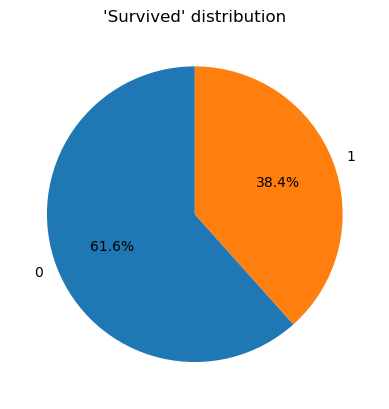

In [21]:
#Pie plot for survived & non- survived percentage; 0- not survived, 1 - survived
Survived = data['Survived'].value_counts()  
plt.pie(
    x= Survived, 
    labels=Survived.index,
    autopct='%1.1f%%',
    startangle=90
)
_ = plt.title("'Survived' distribution")

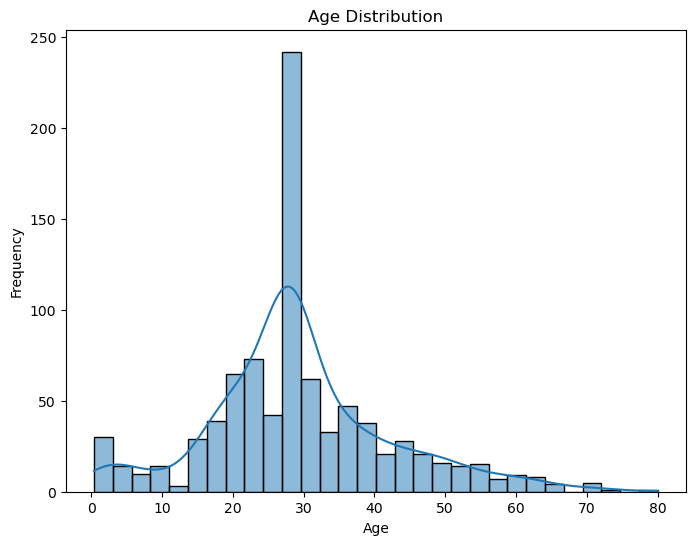

In [23]:
#Histogram for Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

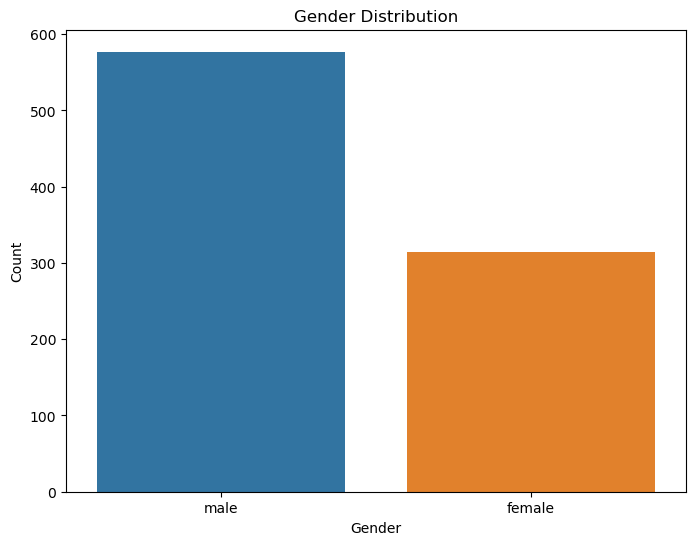

In [24]:
#Bar plot for gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data= data, x='Sex')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

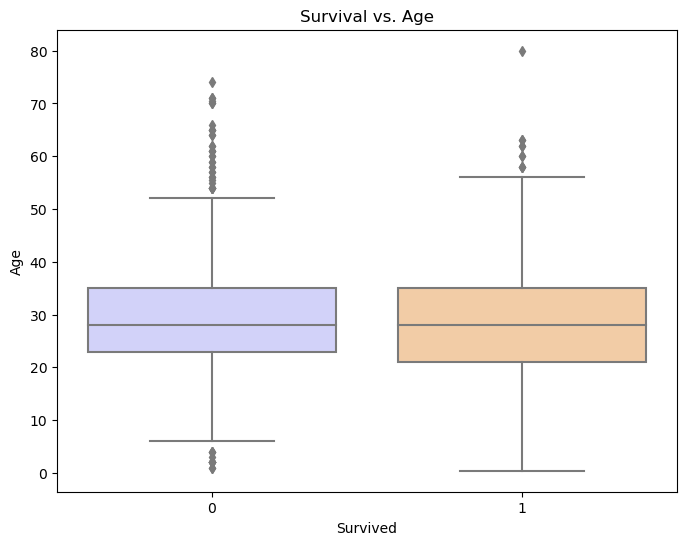

In [27]:
#Box plot for Age vs Survival
plt.figure(figsize=(8, 6))
sns.boxplot(data= data, x='Survived', y='Age', palette=['#ccccff','#ffcc99'])
plt.title('Survival vs. Age')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

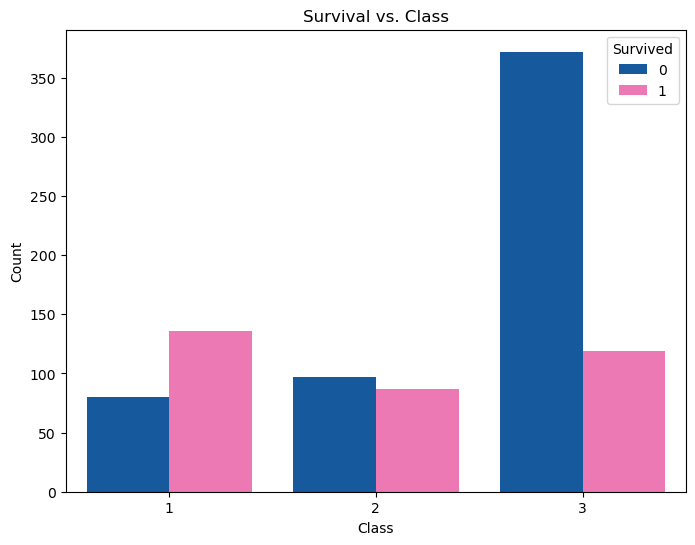

In [32]:
#Barplot for Survival vs Passenger Class
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Pclass', hue='Survived', palette = ['#0059b3','#ff66b3'])
plt.title('Survival vs. Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

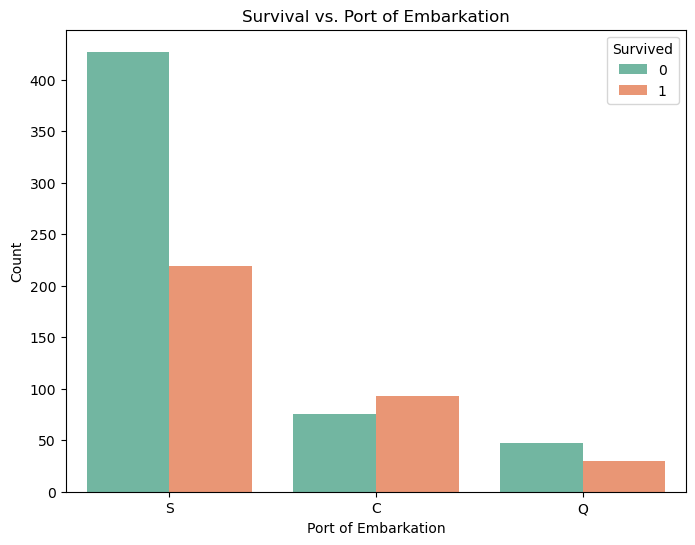

In [42]:
#Countplot for Port of Embarkation
plt.figure(figsize=(8, 6))
sns.countplot(data= data, x='Embarked', hue='Survived', palette='Set2')
plt.title('Survival vs. Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

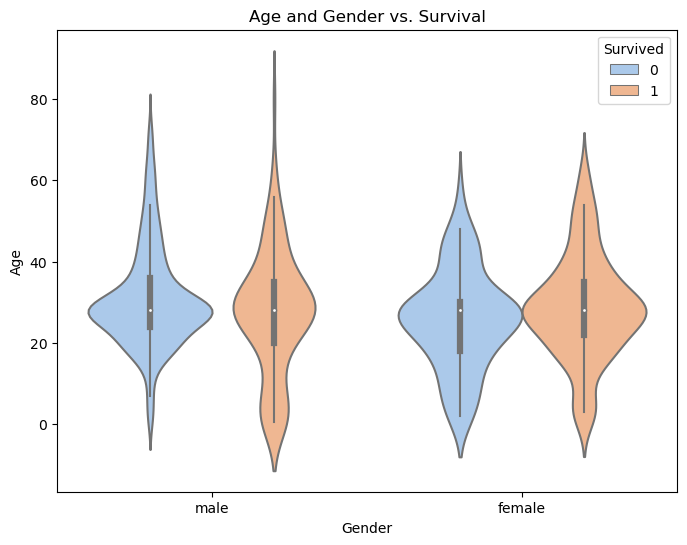

In [43]:
#Violin plot for Age and Gender
plt.figure(figsize=(8, 6))
sns.violinplot(data= data, x='Sex', y='Age', hue='Survived', palette='pastel')
plt.title('Age and Gender vs. Survival')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

C:\Users\mansi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


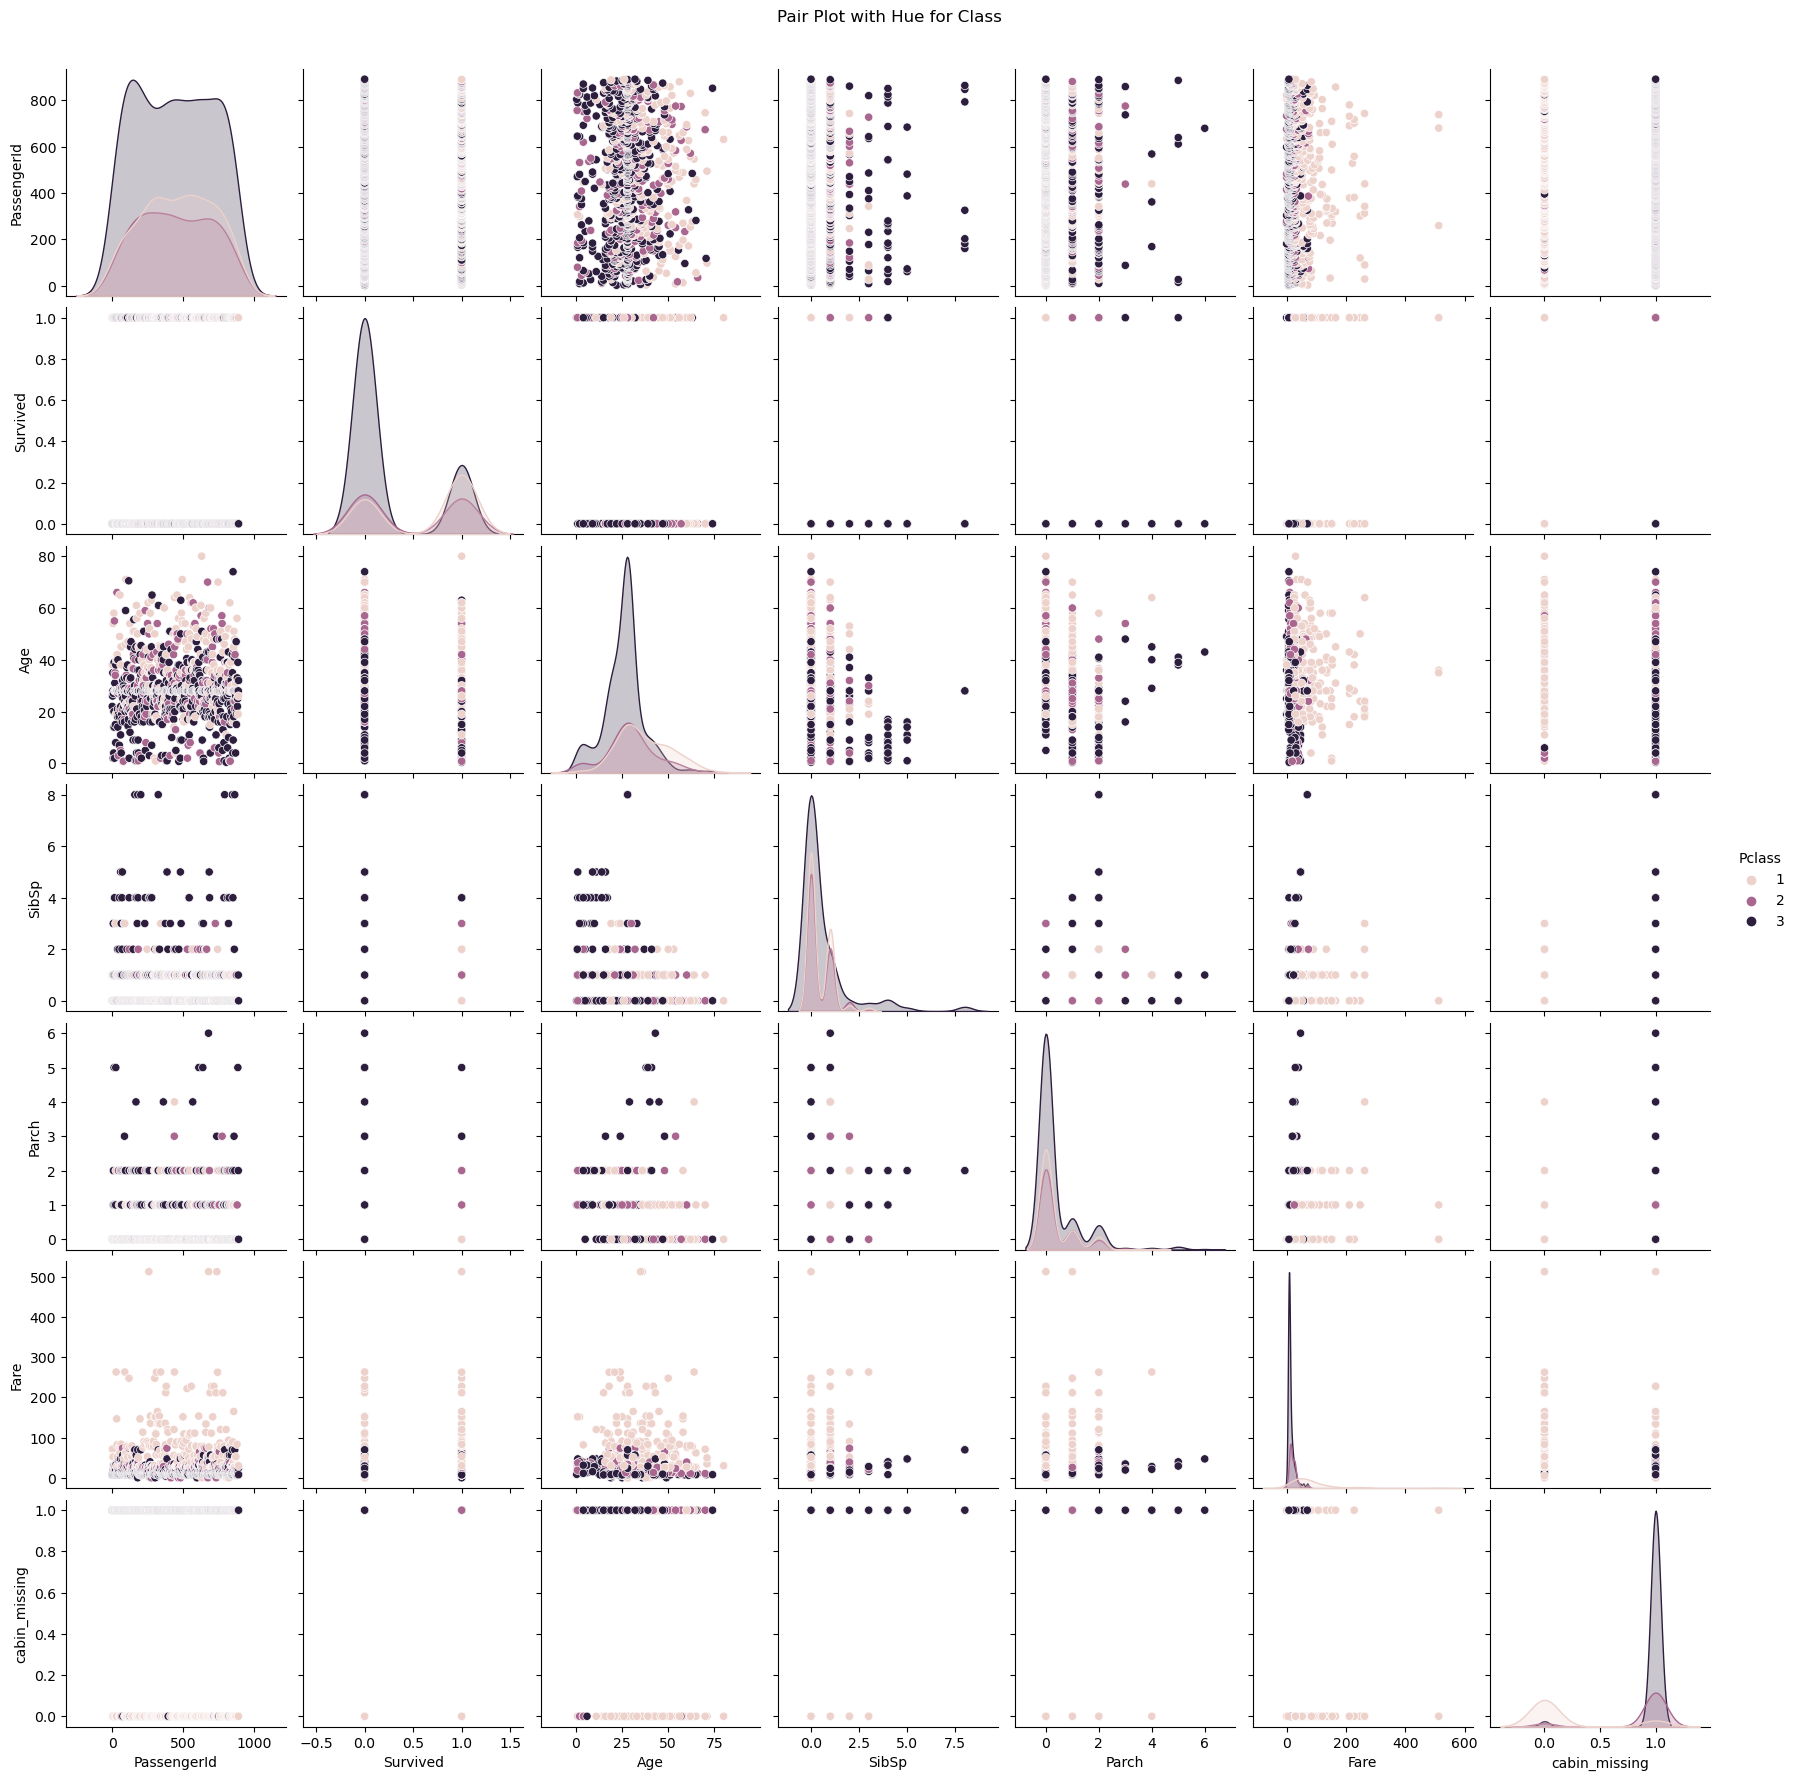

In [44]:
#Pair plot eith hue for Pclass vs Age
sns.pairplot(data, hue='Pclass')
plt.suptitle('Pair Plot with Hue for Class', y=1.02)
plt.show()

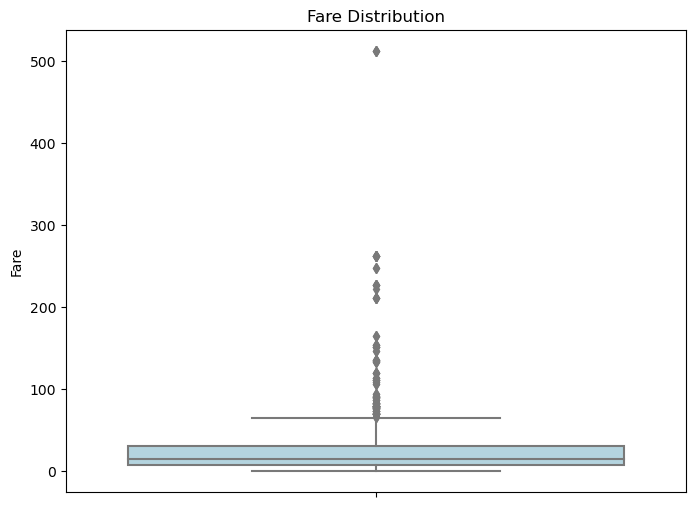

In [45]:
#Box plot for fare distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data= data, y='Fare', color='lightblue')
plt.title('Fare Distribution')
plt.ylabel('Fare')
plt.show()

C:\Users\mansi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mansi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mansi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


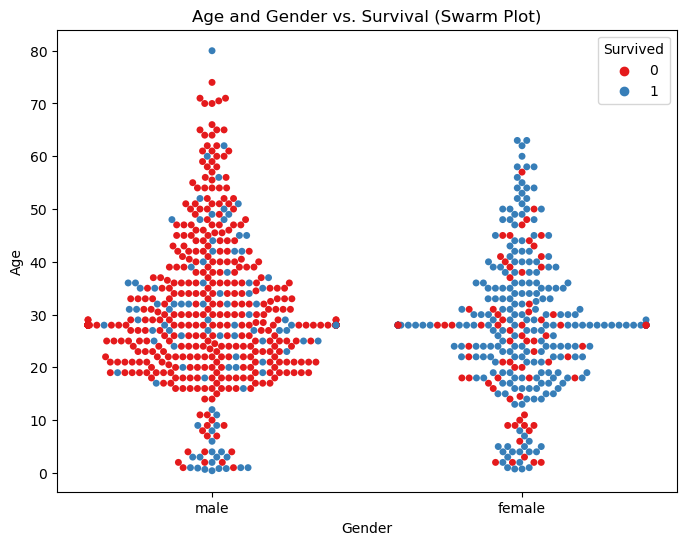

In [46]:
#Swarm plot for Age & Gender
plt.figure(figsize=(8, 6))
sns.swarmplot(data= data, x='Sex', y='Age', hue='Survived', palette='Set1')
plt.title('Age and Gender vs. Survival (Swarm Plot)')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

In [39]:
numeric_columns = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


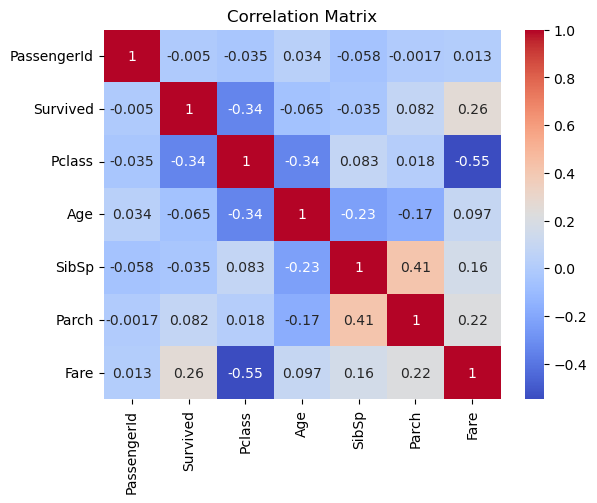

In [40]:
#Heatmap for numerical variables
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

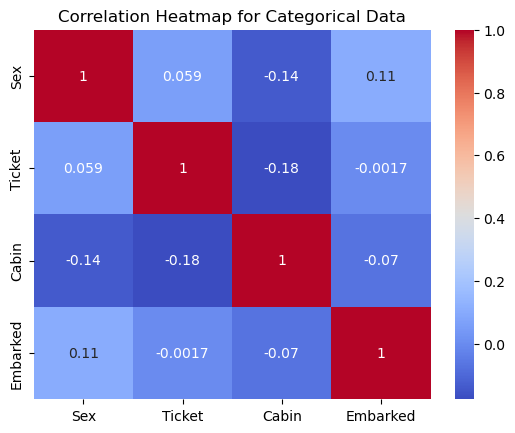

In [51]:
#Heatmap for categorical data
categorical_data = data[['Sex','Ticket', 'Cabin', 'Embarked']]
categorical_data_encoded = categorical_data.apply(lambda x: x.astype('category').cat.codes)
sns.heatmap(categorical_data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Categorical Data')
plt.show()

C:\Users\mansi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


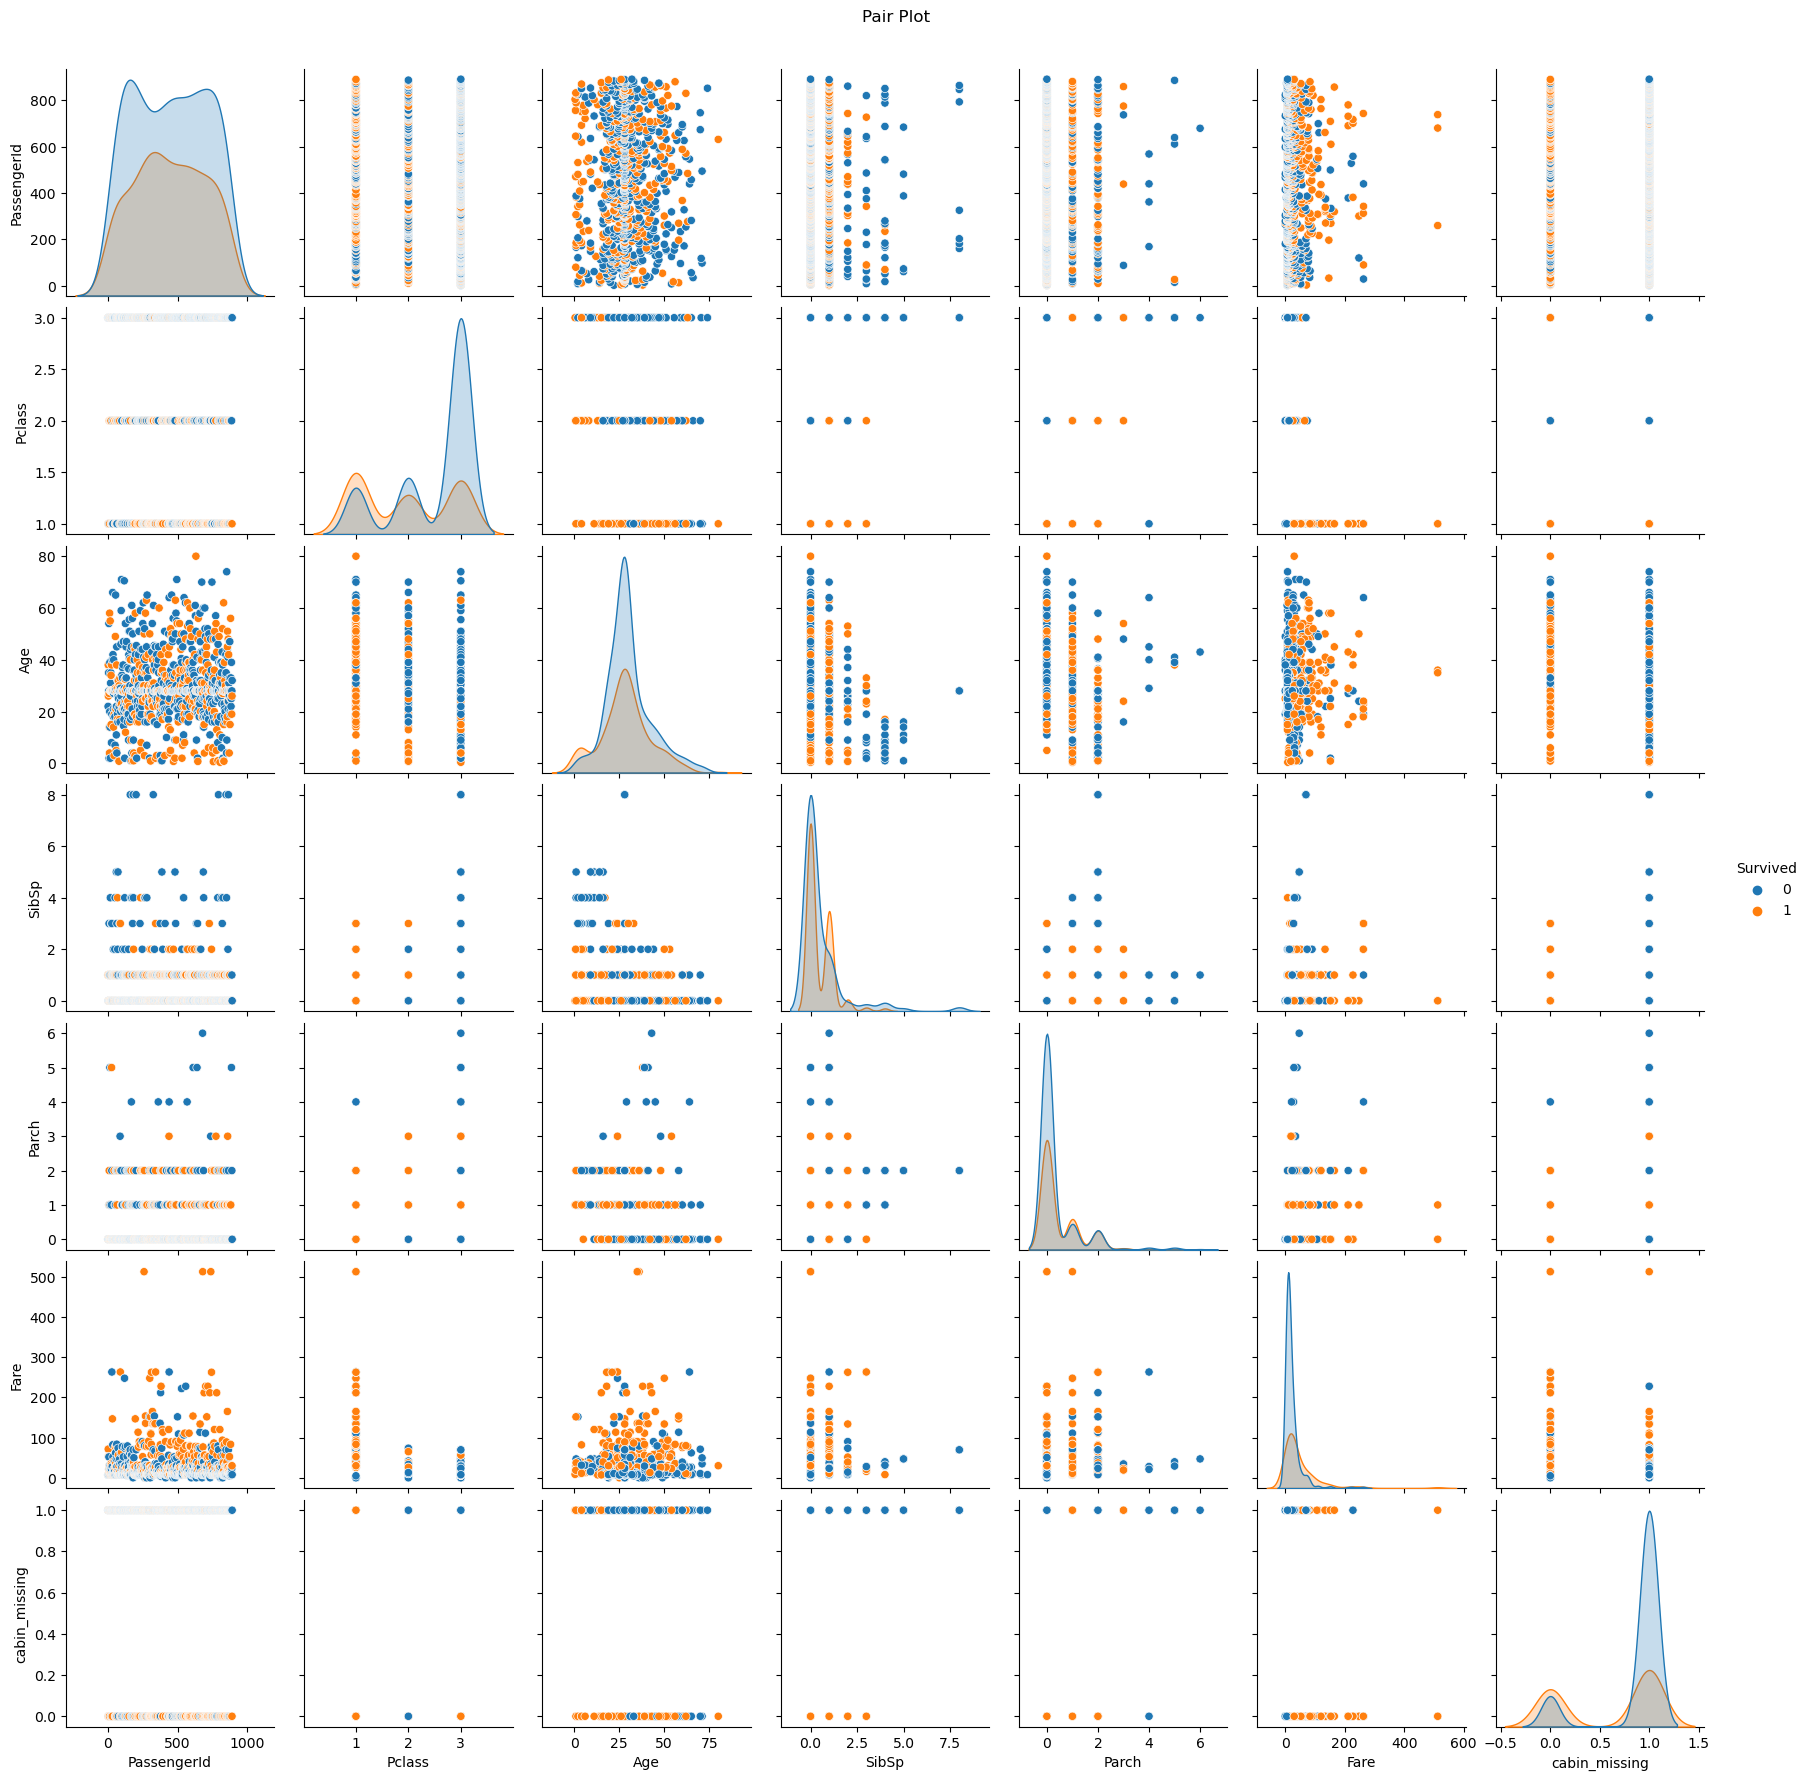

In [34]:
#Pair plot for multivariate analysis
sns.pairplot(data, hue='Survived')
plt.suptitle('Pair Plot', y=1.02)
plt.show()